<a href="https://colab.research.google.com/github/mkirby1995/DS-Unit-2-Sprint-2-Regression/blob/master/Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Regression Sprint Challenge

For this Sprint Challenge, you'll predict the price of used cars. 

The dataset is real-world. It was collected from advertisements of cars for sale in the Ukraine in 2016.

The following import statements have been provided for you, and should be sufficient. But you may not need to use every import. And you are permitted to make additional imports.

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from pylab import rcParams
rcParams['figure.figsize'] = 19, 10
import graphviz
from IPython.display import display
from ipywidgets import interact
from mpl_toolkits import mplot3d
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz


def viztree(decision_tree, feature_names):
    """Visualize a decision tree"""
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

[The dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv) contains 8,495 rows and 9 variables:

- make: manufacturer brand
- price: seller’s price in advertisement (in USD)
- body: car body type
- mileage: as mentioned in advertisement (‘000 Km)
- engV: rounded engine volume (‘000 cubic cm)
- engType: type of fuel
- registration: whether car registered in Ukraine or not
- year: year of production
- drive: drive type

Run this cell to read the data:

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.sample(10)

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
5787,24,4550.0,3,48,2.3,1,1,2005,2
4210,23,5300.0,5,500,2.4,0,1,2004,2
8150,5,3000.0,3,294,2.0,0,0,1999,2
4401,55,16300.0,0,32,1.6,3,1,2012,0
877,4,68500.0,3,44,6.3,3,1,2012,1
72,50,9500.0,5,280,2.2,0,1,2005,2
2680,69,12400.0,0,73,2.0,0,1,2011,0
256,77,7300.0,5,240,1.9,0,1,2005,0
2681,17,3200.0,3,172,1.3,1,1,2006,0
5262,5,27300.0,3,155,2.0,0,1,2012,2


# Predictive Modeling with Linear Regression

## 1.1 Split the data into an X matrix and y vector (`price` is the target we want to predict).

In [0]:
x = df[df.columns.tolist()]
y = df['price']

## 1.2 Split the data into test and train sets, using `train_test_split`.
You may use a train size of 80% and a test size of 20%.

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .2)
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(6796, 9) (1699, 9) (6796,) (1699,)


## 1.3 Use scikit-learn to fit a multiple regression model, using your training data.
Use `year` and one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

In [5]:
linreg = LinearRegression()
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficients for the fitted model.

In [6]:
beta_0 = linreg.intercept_
beta_i = linreg.coef_
print("Slope Coefficients: ", beta_i)
print("\nIntercept Value: ", beta_0)

Slope Coefficients:  [ 5.60636847e-14  1.00000000e+00 -1.67100830e-14 -2.88180937e-16
  2.59431284e-15 -3.39216028e-15 -2.30565401e-14 -3.75370443e-15
 -2.66770791e-14]

Intercept Value:  -1.6370904631912708e-11


## 1.5 Use the test data to make predictions.

In [7]:
Prediction = pd.Series(linreg.predict(x))
Prediction[0]

15499.999999999998

## 1.6 Use the test data to get both the Root Mean Square Error and $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

In [8]:
print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(y, linreg.predict(x))))
print('R-Squared Value\n', linreg.score(x, y))

Root Mean Squared Error
 3.1869227658560254e-11
R-Squared Value
 1.0


## 1.7 How should we interpret the coefficient corresponding to the `year` feature?
One sentence can be sufficient

$\beta_{year}$ is equivalent to the year over year change in price.

## 1.8 How should we interpret the Root Mean Square Error?
One sentence can be sufficient

RMSE is a measure of predictive accuracy.

## 1.9 How should we interpret the $R^2$?
One sentence can be sufficient

$R^2$ is the ammount of variance explained by the model.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['ln_price'] = np.log(df['price'])

## 2.2 Visualize scatterplots of the relationship between each feature versus the log of price, to look for non-linearly distributed features.
You may use any plotting tools and techniques.

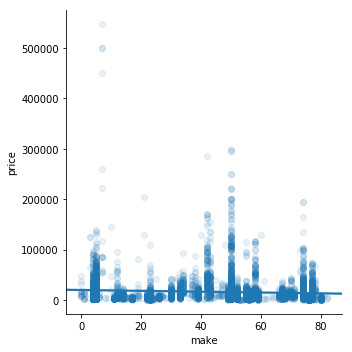

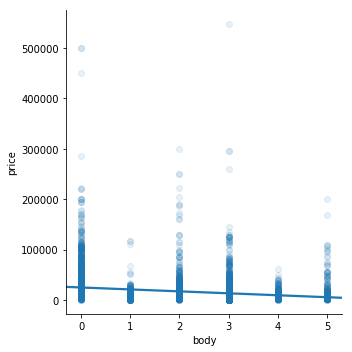

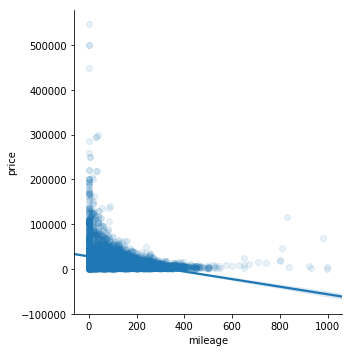

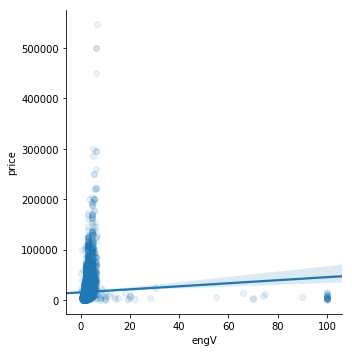

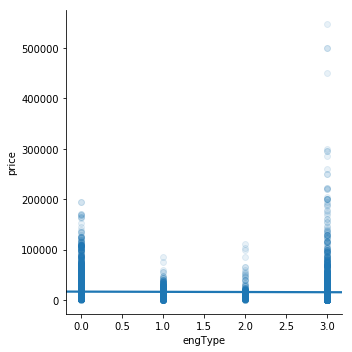

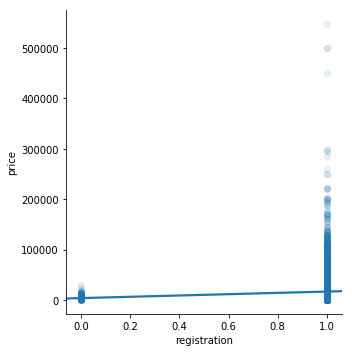

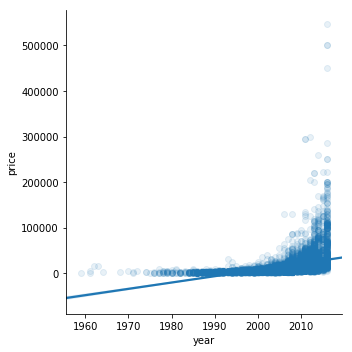

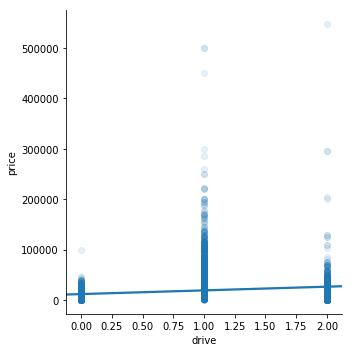

In [10]:
features = df.drop(columns=['price','ln_price']).columns.tolist()
for feature in features:
  sns.lmplot(feature, 'price', data=df, scatter_kws=dict(alpha=0.1))
  plt.show()

## 2.3 Create polynomial feature(s)
You will not be evaluated on which feature(s) you choose. But try to choose appropriate features.

In [0]:
df['year**2'] = df['year']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
def multi_reg(target, feature_list):
  """
  Given a feature list  and a target column name this function will fit a 
  multiple regression.
  """
  # Set feature and target
  target = df[target]
  feature = df[feature_list]
  
  # Train test split
  xtrain, xtest, ytrain, ytest = train_test_split(feature, target, test_size = .2)
  #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
  
  # Set and fit model
  linreg = LinearRegression()
  linreg.fit(feature, target)

  # Intercept and Coefficient
  beta_0 = linreg.intercept_
  beta_i = linreg.coef_
  print("Slope Coefficients: ", beta_i)
  print("\nIntercept Value: ", beta_0, '\n\n')
  
  # RMSE and r^2
  print('Root Mean Squared Error\n', np.sqrt(mean_squared_error(target, linreg.predict(feature))))
  print('R-Squared Value\n', linreg.score(feature, target))


In [13]:
multi_reg('ln_price', features)

Slope Coefficients:  [-1.55103082e-03 -9.58517688e-02 -9.47094034e-05  9.16551654e-03
 -5.81036933e-02  7.22020056e-01  9.49388951e-02  3.90823931e-01]

Intercept Value:  -181.83410109653803 


Root Mean Squared Error
 0.5625546583382708
R-Squared Value
 0.657874264985594


## 2.5 How do we interpret coefficients in Log-Linear Regression (differently than Ordinary Least Squares Regression)?
One sentence can be sufficient

Predicted values are the probability of a particular target value instead of the mean of the targert value.

# Decision Trees

## 3.1 Use scikit-learn to fit a decision tree regression model, using your training data.
Use one or more features of your choice. You will not be evaluated on which features you choose. You may choose to use all features.

You may use the log-transformed target or the original un-transformed target. You will not be evaluated on which you choose.

In [0]:
def decision_tree(target, feature, max_depth):
  """
  Given a target and feature column names (df['target_name'],
  df[[feature_name]]) and a mex tree depth (int) this function will fit
  a decision tree and display a visual representation.
  """
  x = feature
  y = target
  
  # Train test split
  xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .2)
  #print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)
  
  # Set and fit model
  tree = DecisionTreeRegressor(max_depth=max_depth)
  tree.fit(x, y)

  # R^2
  test_score = tree.score(xtest, ytest)
  train_score = tree.score(xtrain, ytrain)
  print('Test R-Squared Value\n', test_score)
  print('Train R-Squared Value\n', train_score)

  display(viztree(tree, feature_names=['1','2','3','4','5','6','7','8']))

Test R-Squared Value
 0.827808356796172
Train R-Squared Value
 0.8234200261833742


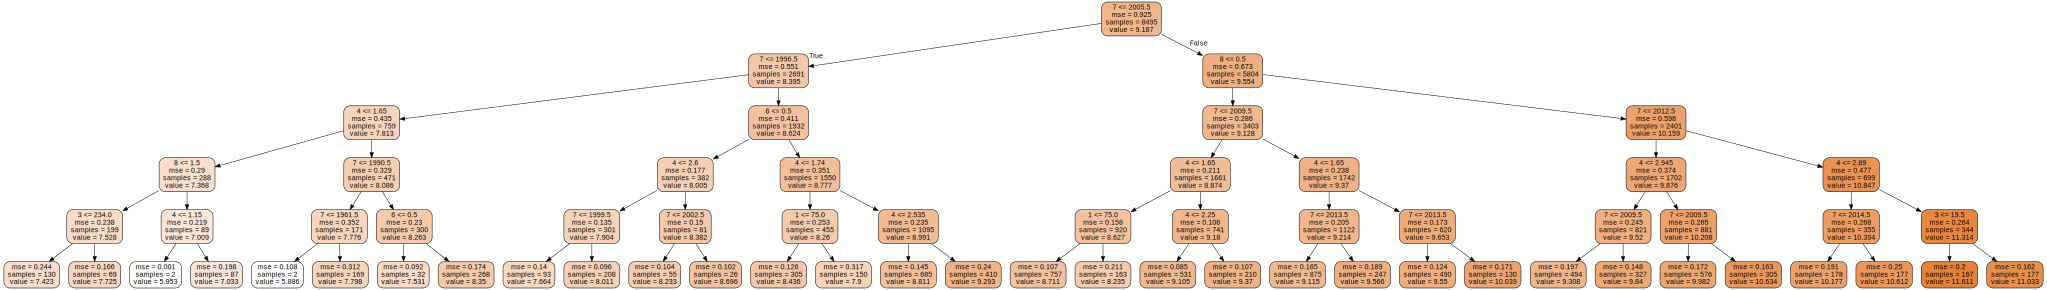

In [17]:
decision_tree(df['ln_price'], df[features], 5)

## 3.2 Use the test data to get the $R^2$ for the model. 
You will not be evaluated on how high or low your scores are.

Test R-Squared Value
 0.8193867739360753
Train R-Squared Value
 0.8256094494394673


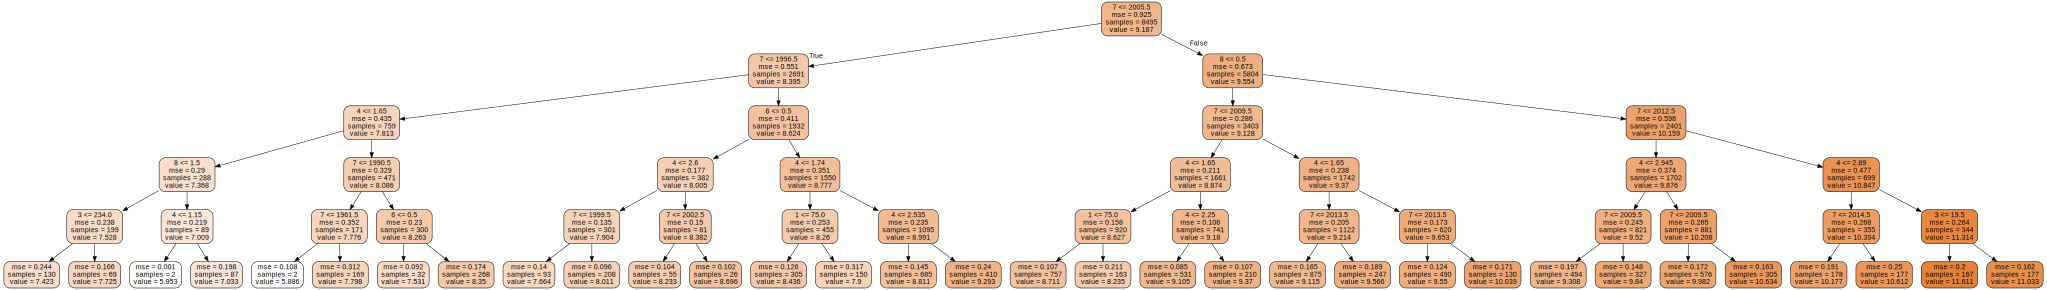

In [18]:
decision_tree(df['ln_price'], df[features], 5)

# Regression Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [19]:
target = 'ln_price'

X = df[features] 
y = df[target]

model = sm.OLS(y, X)
results = model.fit(cov_type='HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.880e+05
Date:                Fri, 03 May 2019   Prob (F-statistic):               0.00
Time:                        16:03:29   Log-Likelihood:                -9774.5
No. Observations:                8495   AIC:                         1.956e+04
Df Residuals:                    8487   BIC:                         1.962e+04
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
make            -0.0035      0.000     -9.106   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. 

### Do we have multicollinearity problems?
One sentence can be sufficient

In [20]:
X = sm.add_constant(X)
vif = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
pd.Series(vif, X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const           123262.013632
make                 1.059149
body                 1.158326
mileage              1.549610
engV                 1.009321
engType              1.141183
registration         1.091892
year                 1.458528
drive                1.131021
dtype: float64